[**Demo %s**](#demo-adapt-motive)

This function gets increasingly oscillatory as $x$ increases.

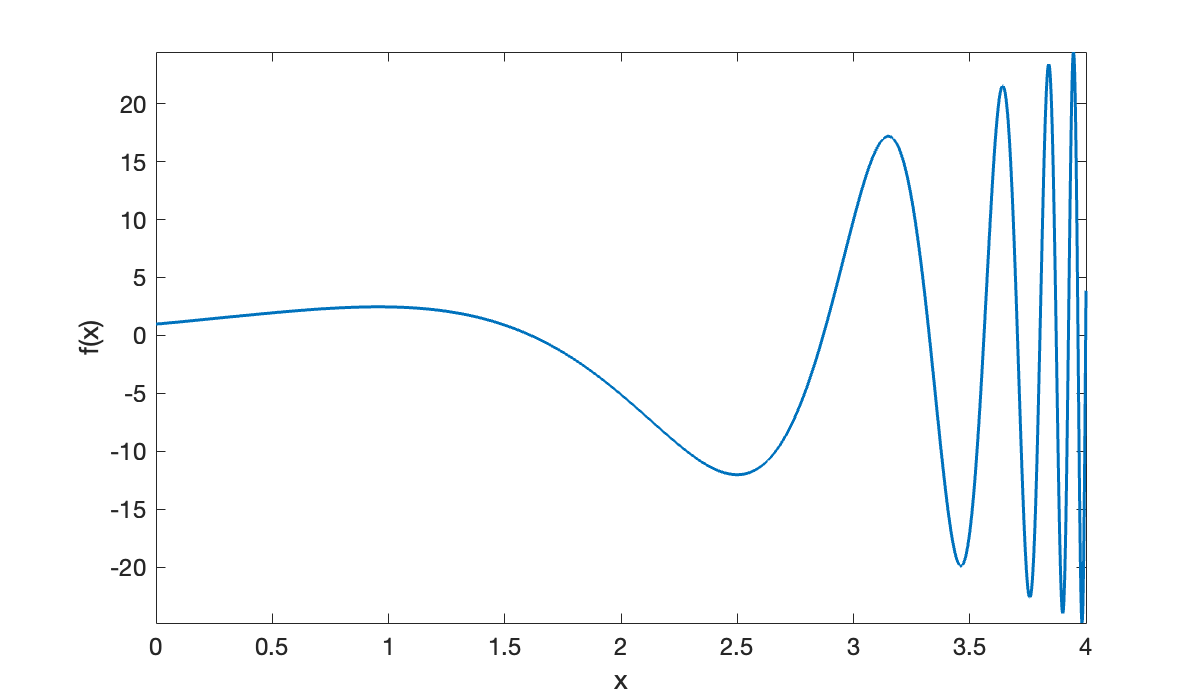

In [17]:
f = @(x) (x + 1).^2 .* cos((2 * x + 1) ./ (x - 4.3));
clf
fplot(f, [0, 4], 2000)
xlabel('x'), ylabel(('f(x)'));

Accordingly, the trapezoid rule is more accurate on the left half of this interval than on the right half.

In [18]:
left_val = integral(f, 0, 2, abstol=1e-14, reltol=1e-14);
right_val = integral(f, 2, 4, abstol=1e-14, reltol=1e-14);

n = round(50 * 2 .^ (0:3)');
err = zeros(length(n), 2);
for i = 1:length(n)
    T = trapezoid(f, 0, 2, n(i));
    err(i, 1) = T - left_val;
    T = trapezoid(f, 2, 4, n(i));
    err(i, 2) = T - right_val;
end
disp(table(n, err(:, 1), err(:, 2), variableNames=["n", "left error", "right error"]))

     n     left error     right error
    ___    ___________    ___________

     50     -0.0024911       0.50423 
    100    -0.00062271      0.096004 
    200    -0.00015568      0.022547 
    400    -3.8919e-05     0.0055542 



Both the picture and the numerical results suggest that more nodes should be used on the right half of the interval than on the left half.